In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.inspection import permutation_importance
import shap
from scipy.stats import sem

from mlxtend.plotting import plot_decision_regions

import math


In [2]:

def get_results(truth, prediction, df, idx):
    
    y_test2 = truth.map({'Control':0, 'Case':1})
    y_pred2 = pd.Series(prediction).map({'Control':0, 'Case':1})


    acc = accuracy_score(y_test2, y_pred2)
    f1 = f1_score(y_test2, y_pred2)
    precision = precision_score(y_test2, y_pred2)
    recall = recall_score(y_test2, y_pred2)

    df.loc[idx,:] = [acc, f1, precision, recall]

    return df


In [3]:
data = pd.read_csv("/rds/general/project/hda_21-22/live/TDS/Group_2/TDS-Group-Project/Data_exploration/Outputs/CRC_data_5_year_ordered_V3.csv")
data = data.drop(columns = ['date_diagnosis', 'CRC_dvlp_year'
                    , 'age_first_screened_CRC', 'CRC_screening_0'
                    , 'death_date_0', 'group', 'Unnamed: 0'
                           , 'incident_case', 'prevalent_case',
                           'age_recr'])

numerical = ["Smoking_pack_year","Height", "weight","waist_hip_ratio",
"pulse", "sysBP",  "diaBP"   , "deprivation_townsend" , "household_income_GBP"
, "score_income"    , "score_employment"          , "score_health" ,
"score_education" , "score_housing"         , "score_living_environment" ,
"time_TV" , "time_computer" , "weekly_mobile_len_hrs"     , "sleep_duration"
, "smoking_num_household" , "overall_health_rate"    , "pollution_NO_2010"   ,
"pollution_particulate_PM10"        , "pollution_particulate_PM2.5"   ,
"pollution_particulate_PM2.5_absorbance" , "pollution_particulate_PM_course" ,
"diet_cereal"       , "diet_tea"    , "diet_water" ,        "weekly_red_wine"
, "weekly_champagne_and_white_wine"  , "weekly_beer"                  ,
"weekly_spirits"   , "weekly_fortified_wine" , "father_death_age" ,
"mother_death_age"    , "biomarker_RBC" , "biomarker_HCT" ,
"biomarker_platelet"    , "biomarker_lymphocyte"     , "biomarker_Neu" ,
"biomarker_urine_K"  , "biomarker_urine_Na"    , "biomarker_CHL" ,
"biomarker_CRP" , "biomarker_glucose"      , "biomarker_HbA1c" ,
"biomarker_HDL" , "biomarker_IGF_one"  , "biomarker_LDL" , "biomarker_TBL" ,
"biomarker_Tprotein" , "biomarker_TRG"                    , "biomarker_VD" ,
"meds_Statins" , "meds_Antioxidants"             , "meds_Antibiotics" ,
"meds_ACEI"   , "meds_ARB" , "meds_CCB"         , "meds_BetaBlocker"   ,
"meds_diuretics"                    , "meds_HBlocker"      , "meds_metformin"
, "meds_omega_3" , "ops_appendicectomy" , "ops_cholecystectomy"    ,
"ops_sterilisation"                 , "Comorb_asthma"    , "Comorb_depression"
, "Comorb_Gastro_Oesophageal_Reflux"      , "Comorb_Allergic"         ,
"Comorb_hypothyroidism" , "Comorb_osteoarthritis"                ,
"Comorb_benign_rectal_neoplasms_polyps"  ,
"Comorb_Intestinal_infectious_diseases"  , "Comorb_infectious" ,
"Comorb_any_neoplasms"    ,                "Comorb_Blood_Immune"    ,
"Comorb_Endocrine_thyroid"            ,    "Comorb_Diabetes_Complication"  ,
"Comorb_Obesity"         , "Comorb_Metabolic_disorders"         ,
"Comorb_Mental_disorder"    ,              "Comorb_Nervous_system"     ,
"Comorb_Eye_adnexa"                 ,      "Comorb_Ear"        ,
"Comorb_Hypertensive_Heart" , "Comorb_Ischaemic_heart"            ,
"Comorb_other_heart_diseases"  ,           "Comorb_Cerebrovascular"     ,
"Comorb_Arteries"                   ,      "Comorb_Veins"  ,
"Comorb_Respiratory"     , "Comorb_oral"                   ,
"Comorb_Gastrooesophageal_reflux_disease", "Comorb_Other_oesophagus"  ,
"Comorb_Gastric_ulcer"                 ,   "Comorb_Duodenal_ulcer"    ,
"Comorb_Gastritis_duodenitis"   , "Comorb_Dyspepsia"                    ,
"Comorb_other_stomach"     ,               "Comorb_Appendix"       ,
"Comorb_Hernia"                       ,    "Comorb_IBD"       ,
"Comorb_Other_intestines"    , "Comorb_Liver"                          ,
"Comorb_Gallbladder"  ,                    "Comorb_skin"       ,
"Comorb_Renal_Failure"                   , "Comorb_Urolithiasis"  ,
"Comorb_Other_urinary"       , "Comorb_Congenital"                   ,
"Comorb_Other_Circ_symptoms"    ,          "Comorb_Other_Digest_symptoms" ,
"Comorb_Other_Urinary_symptoms" , "tt_status", "cc_status"]

df = pd.DataFrame()
for col in numerical:
    df = df.append(data.pop(col))

numericals = df.T


for col in data.columns:
    data[col] = data[col].astype('category')
    
data[numerical] = numericals




df1 = data.pop('cc_status') # remove column b and store it in df1
df1 = df1.map({0:'Control', 1:'Case'})

data['cc_status']=df1 # add b series as a 'new' column.



data['cc_status'] = data['cc_status'].astype('category')



In [4]:
X_train = data.loc[data['tt_status'] == 'train']
X_train = X_train.drop(['tt_status'], axis = 1)
y_train = X_train[['cc_status']]
y_train = y_train.squeeze()
X_train = X_train.drop(['cc_status'], axis = 1)

X_test = data.loc[data['tt_status'] == 'test']
X_test = X_test.drop(['tt_status'], axis = 1)
y_test = X_test[['cc_status']]
y_test = y_test.squeeze()
X_test = X_test.drop(['cc_status'], axis = 1)

In [5]:
results = pd.DataFrame(index = ['Decision Tree'], 
                       columns = ['accuracy', 'f1', 'precision', 'recall'])



In [6]:
parameters = {'max_depth':range(2,10),'min_samples_leaf':[4,8,16,32,64,128,264,512], 
              'criterion' :['gini', 'entropy'], 'class_weight':[{'Control':1, 'Case':2}]}

clf = GridSearchCV(DecisionTreeClassifier(random_state = 8), 
                   parameters, n_jobs=31, scoring = 'roc_auc')
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_

y_pred = tree_model.predict(X_test)

## Convert strings to ints to work with accuracy score functions
y_test2 = y_test.map({'Control':0, 'Case':1})
y_pred2 = pd.Series(y_pred).map({'Control':0, 'Case':1})

results = get_results(y_test, y_pred, results, 'Decision Tree')



accuracy = 0.587162654996353, f1 = 0.35388127853881274. precision = 0.37259615384615385, recall = 0.33695652173913043
{'class_weight': {'Control': 1, 'Case': 2}, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 264}


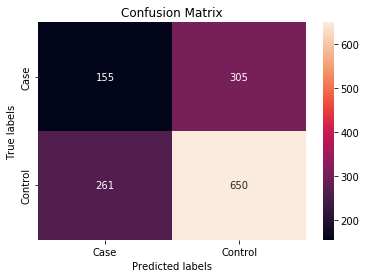

In [7]:
acc = accuracy_score(y_test2, y_pred2)
f1 = f1_score(y_test2, y_pred2)
precision = precision_score(y_test2, y_pred2)
recall = recall_score(y_test2, y_pred2)

print('accuracy = {}, f1 = {}. precision = {}, recall = {}'.format(acc, f1, precision, recall))
print(clf.best_params_)

labels = ['Case', 'Control']
cm = confusion_matrix(y_test, y_pred, labels=labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Case', 'Control']); 
ax.yaxis.set_ticklabels(['Case', 'Control'])
plt.show()


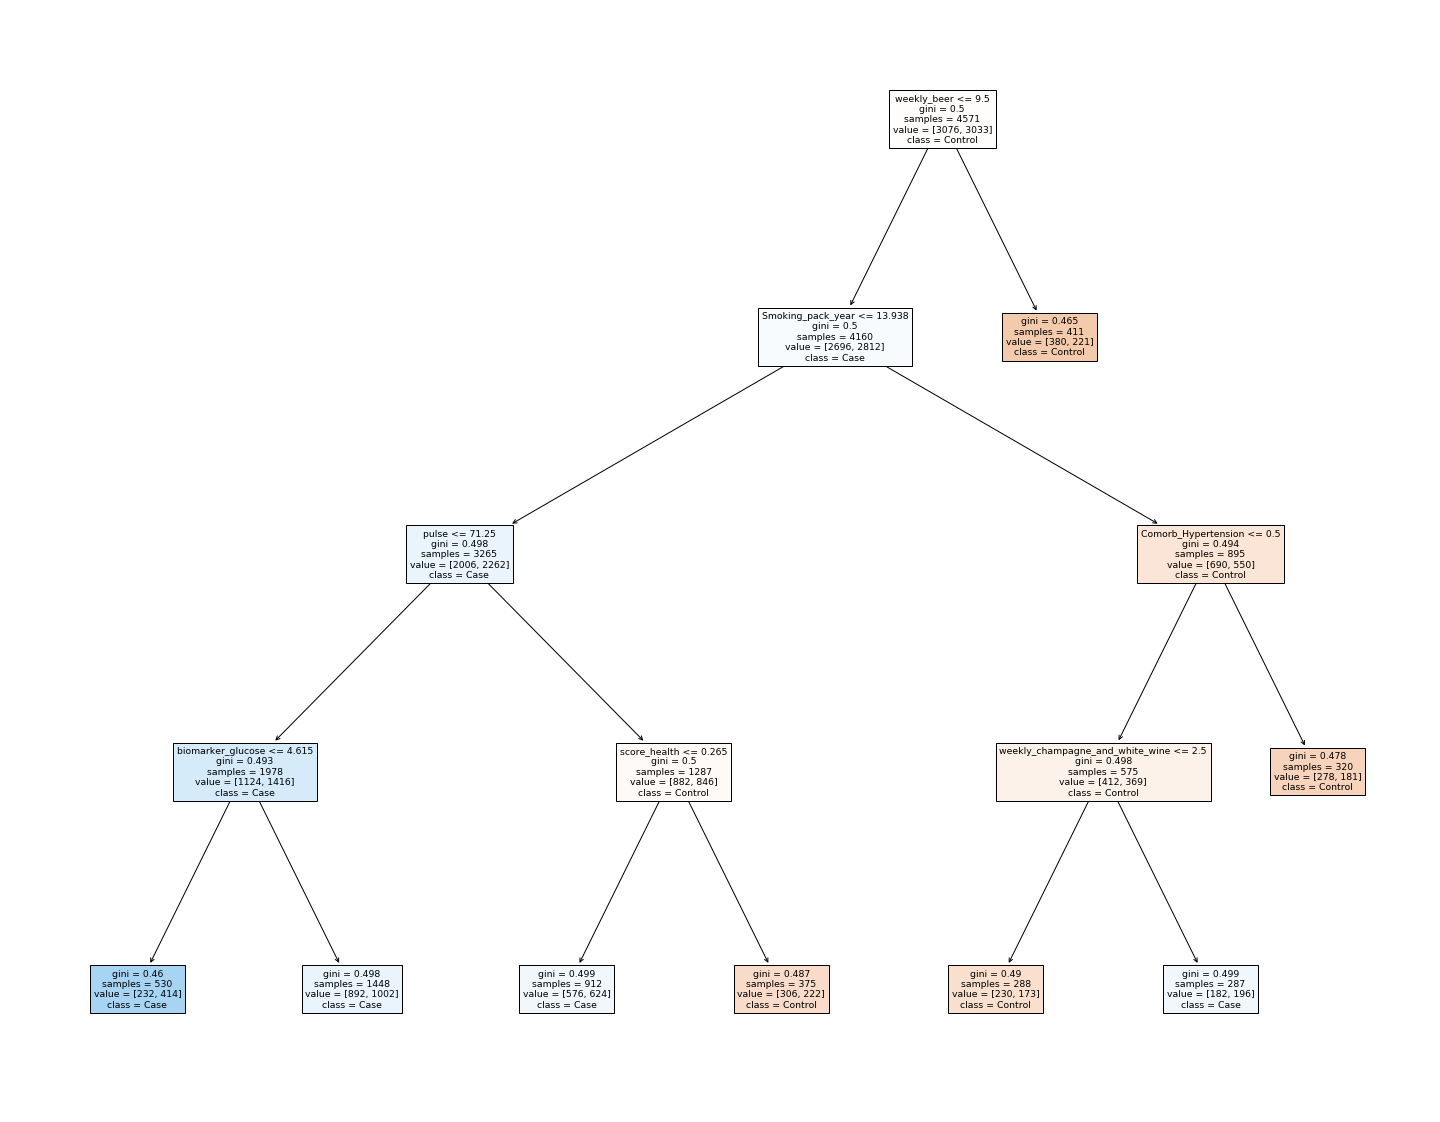

In [8]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model, 
                   feature_names=X_train.columns,  
                   class_names=['Control', 'Case'],
                   filled=True)

fig.show() # Easy to see the graph here


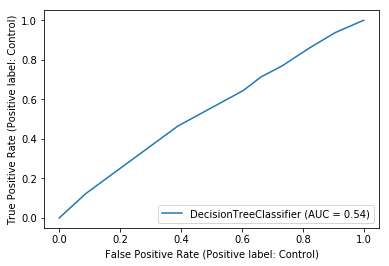

In [8]:
plot_roc_curve(tree_model,X_test,y_test)
plt.show()

In [23]:
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

In [39]:
y_test = y_test.reset_index()
y_test = y_test.drop(columns = ["index"])
y_test = y_test.squeeze()
y_test = y_test.map({'Control':0, 'Case':1})

In [40]:
y_pred = pd.Series(y_pred).map({'Control':0, 'Case':1})

In [41]:
rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_test[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_test[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))


sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()


Bootstrap #1 ROC area: 0.501
Bootstrap #2 ROC area: 0.526
Bootstrap #3 ROC area: 0.521
Bootstrap #4 ROC area: 0.517
Bootstrap #5 ROC area: 0.525
Bootstrap #6 ROC area: 0.519
Bootstrap #7 ROC area: 0.533
Bootstrap #8 ROC area: 0.532
Bootstrap #9 ROC area: 0.511
Bootstrap #10 ROC area: 0.525
Bootstrap #11 ROC area: 0.505
Bootstrap #12 ROC area: 0.530
Bootstrap #13 ROC area: 0.511
Bootstrap #14 ROC area: 0.517
Bootstrap #15 ROC area: 0.541
Bootstrap #16 ROC area: 0.516
Bootstrap #17 ROC area: 0.540
Bootstrap #18 ROC area: 0.508
Bootstrap #19 ROC area: 0.537
Bootstrap #20 ROC area: 0.527
Bootstrap #21 ROC area: 0.531
Bootstrap #22 ROC area: 0.520
Bootstrap #23 ROC area: 0.507
Bootstrap #24 ROC area: 0.514
Bootstrap #25 ROC area: 0.541
Bootstrap #26 ROC area: 0.527
Bootstrap #27 ROC area: 0.523
Bootstrap #28 ROC area: 0.539
Bootstrap #29 ROC area: 0.516
Bootstrap #30 ROC area: 0.519
Bootstrap #31 ROC area: 0.528
Bootstrap #32 ROC area: 0.498
Bootstrap #33 ROC area: 0.532
Bootstrap #34 ROC a

In [42]:
# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

Confidence interval for the score: [0.504 - 0.548]
